<a href="https://colab.research.google.com/github/carlolopez03/Prediction-of-Product-Sales/blob/main/Prediction_of_Product_Sales.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Prediction of Product Sales**
  Author: Carlo Lopez

## **Project Overview**

## **Load and Inspect Data**

In [62]:
#Imports
import pandas as pd
import numpy as np
import missingno as msno
import matplotlib.pyplot as plt
import seaborn as sns


#Loading Data
file = '/content/drive/MyDrive/CodingDojo/01-Fundamentals/Week02/Data/sales_predictions_2023.csv'
df_sp = pd.read_csv(file)
df_sp.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [63]:
df_sp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


## **Clean Data**

In [64]:
#Finding # of rows and columns
df_sp.shape

(8523, 12)

- There are 8523 rows and 12 columns

In [65]:
#Finding data type for each variable
df_sp.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

In [66]:
#Looking for duplicates
duplicated_rows = df_sp.duplicated()
duplicated_rows

0       False
1       False
2       False
3       False
4       False
        ...  
8518    False
8519    False
8520    False
8521    False
8522    False
Length: 8523, dtype: bool

In [67]:
df_sp.duplicated().sum()

0

- There are no duplicates

In [68]:
#Identifying missing values
null_sums = df_sp.isna().sum()
null_sums

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [69]:
null_percent = null_sums/len(df_sp) * 100
null_percent

Item_Identifier               0.000000
Item_Weight                  17.165317
Item_Fat_Content              0.000000
Item_Visibility               0.000000
Item_Type                     0.000000
Item_MRP                      0.000000
Outlet_Identifier             0.000000
Outlet_Establishment_Year     0.000000
Outlet_Size                  28.276428
Outlet_Location_Type          0.000000
Outlet_Type                   0.000000
Item_Outlet_Sales             0.000000
dtype: float64

In [70]:
#Addressing missing values
cat_cols = df_sp.select_dtypes('object').columns
df_sp[cat_cols] = df_sp[cat_cols].fillna('MISSING')
cat_cols

Index(['Item_Identifier', 'Item_Fat_Content', 'Item_Type', 'Outlet_Identifier',
       'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type'],
      dtype='object')

In [71]:
num_cols = df_sp.select_dtypes('number').columns
df_sp[num_cols] = df_sp[num_cols].fillna(-1)
num_cols

Index(['Item_Weight', 'Item_Visibility', 'Item_MRP',
       'Outlet_Establishment_Year', 'Item_Outlet_Sales'],
      dtype='object')

In [72]:
df_sp.isna().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [73]:
#Finding inconsistent categories of data
string_cols = df_sp.select_dtypes('object').columns
for col in string_cols:
  print(f'Value Counts for{col}')
  print(df_sp[col].value_counts())
  print('\n')

Value Counts forItem_Identifier
FDW13    10
FDG33    10
NCY18     9
FDD38     9
DRE49     9
         ..
FDY43     1
FDQ60     1
FDO33     1
DRF48     1
FDC23     1
Name: Item_Identifier, Length: 1559, dtype: int64


Value Counts forItem_Fat_Content
Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64


Value Counts forItem_Type
Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64


Value Counts forOutlet_Identifier
OUT027    935
OUT013    932
OUT049    930
OUT046    930
OUT0

In [74]:
df_sp['Item_Fat_Content'].value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

In [75]:
df_sp['Item_Fat_Content'] = df_sp['Item_Fat_Content'].replace({'LF': 'Low Fat','low fat': 'Low Fat','reg': 'Regular'})
df_sp['Item_Fat_Content'].value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

In [76]:
df_sp[num_cols].describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,10.478936,0.066132,140.992782,1997.831867,2181.288914
std,6.720742,0.051598,62.275067,8.371760,1706.499616
min,-1.000000,0.000000,31.290000,1985.000000,33.290000
25%,6.650000,0.026989,93.826500,1987.000000,834.247400
50%,11.000000,0.053931,143.012800,1999.000000,1794.331000
75%,16.000000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


## **Exploratory Data Analysis**

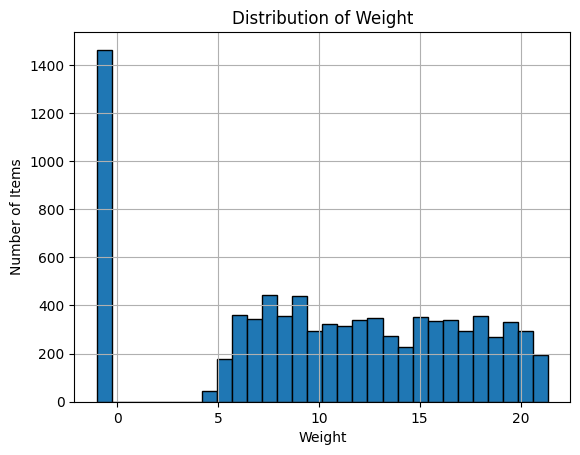

In [77]:

ax = df_sp['Item_Weight'].hist(bins = 30, edgecolor = 'black')
ax.set_title('Distribution of Weight')
ax.set_xlabel('Weight')
ax.set_ylabel('Number of Items');


In [78]:
df_sp.describe().round(2)


,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,8523.00,8523.00,8523.00,8523.00,8523.00
mean,10.48,0.07,140.99,1997.83,2181.29
std,6.72,0.05,62.28,8.37,1706.50
min,-1.00,0.00,31.29,1985.00,33.29
25%,6.65,0.03,93.83,1987.00,834.25
50%,11.00,0.05,143.01,1999.00,1794.33
75%,16.00,0.09,185.64,2004.00,3101.30
max,21.35,0.33,266.89,2009.00,13086.96


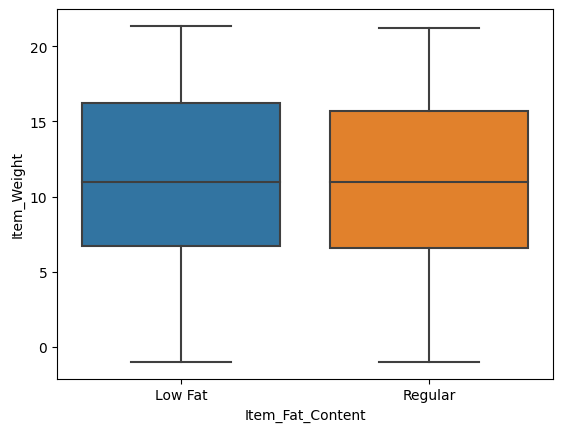

In [79]:
ax =sns.boxplot(data=df_sp, x='Item_Fat_Content', y='Item_Weight')


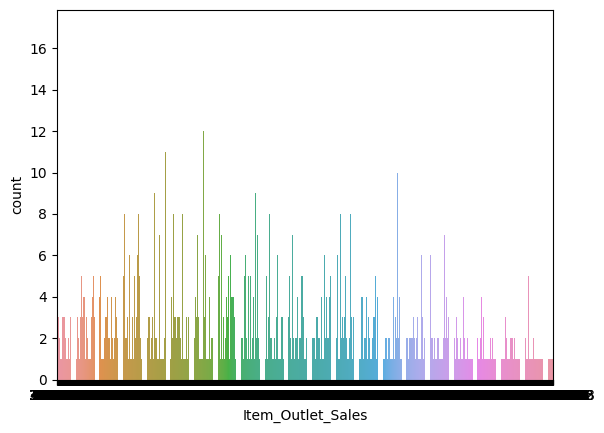

In [80]:
ax = sns.countplot(data=df_sp, x='Item_Outlet_Sales')

In [81]:
corr = df_sp.corr(numeric_only=True);
corr.round(2)

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
Item_Weight,1.00,-0.08,0.02,0.54,-0.06
Item_Visibility,-0.08,1.00,-0.00,-0.07,-0.13
Item_MRP,0.02,-0.00,1.00,0.01,0.57
Outlet_Establishment_Year,0.54,-0.07,0.01,1.00,-0.05
Item_Outlet_Sales,-0.06,-0.13,0.57,-0.05,1.00


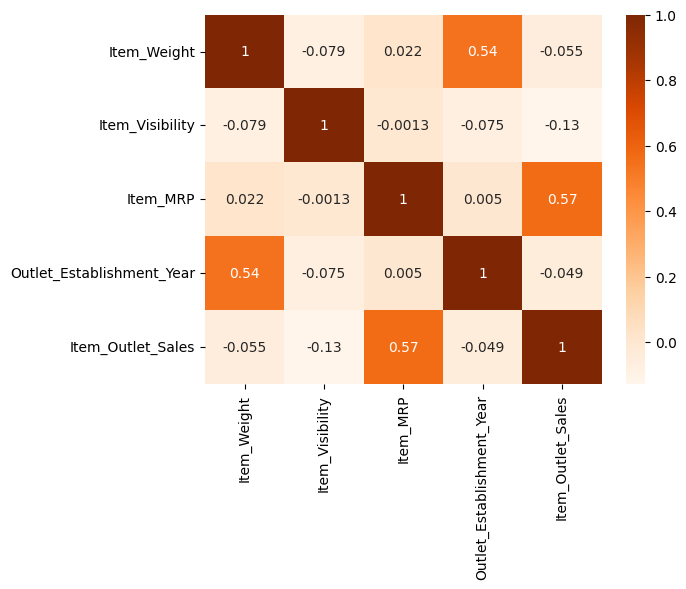

In [82]:
sns.heatmap(corr, cmap = 'Oranges', annot=True);

## **Feature Inspection**

In [83]:
df_sp[cat_cols] = df_sp[cat_cols].replace('MISSING', np.nan)
df_sp[cat_cols].value_counts()

Item_Identifier  Item_Fat_Content  Item_Type              Outlet_Identifier  Outlet_Size  Outlet_Location_Type  Outlet_Type      
DRA12            Low Fat           Soft Drinks            OUT013             High         Tier 3                Supermarket Type1    1
FDV27            Regular           Meat                   OUT019             Small        Tier 1                Grocery Store        1
FDV32            Low Fat           Fruits and Vegetables  OUT035             Small        Tier 2                Supermarket Type1    1
                                                          OUT019             Small        Tier 1                Grocery Store        1
                                                          OUT018             Medium       Tier 3                Supermarket Type2    1
                                                                                                                                    ..
FDJ33            Regular           Snack Foods            OU

In [84]:
df_sp[num_cols] = df_sp[num_cols].replace('-1', np.nan)
df_sp[num_cols].value_counts()

Item_Weight  Item_Visibility  Item_MRP  Outlet_Establishment_Year  Item_Outlet_Sales
-1.000       0.000000         37.0506   1985                       986.7156             1
 14.350      0.028519         109.2228  1998                       221.0456             1
 14.500      0.000000         169.6448  2004                       2045.3376            1
                              159.3262  2004                       2864.2716            1
                              154.4682  1987                       1524.6820            1
                                                                                       ..
 7.945       0.015901         163.8210  1999                       1794.3310            1
             0.015873         161.3210  2004                       2773.0570            1
             0.015863         161.8210  1987                       2446.8150            1
 7.935       0.031866         261.2910  2009                       2892.9010            1
 21.350      0.

###**Unvariate Visualization**##

In [99]:
df_sp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                8523 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [103]:
temp_df = df_sp.copy()

In [105]:
x = 'Outlet_Location_Type'
placeholder = 'Missing'
temp_df[x] = temp_df[x].fillna(placeholder)

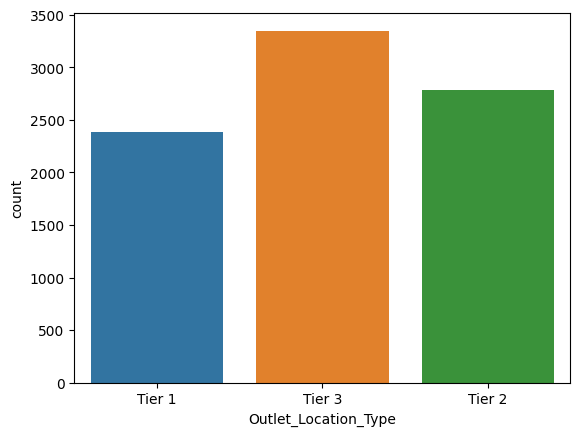

In [106]:
sns.countplot(data=temp_df, x=x);


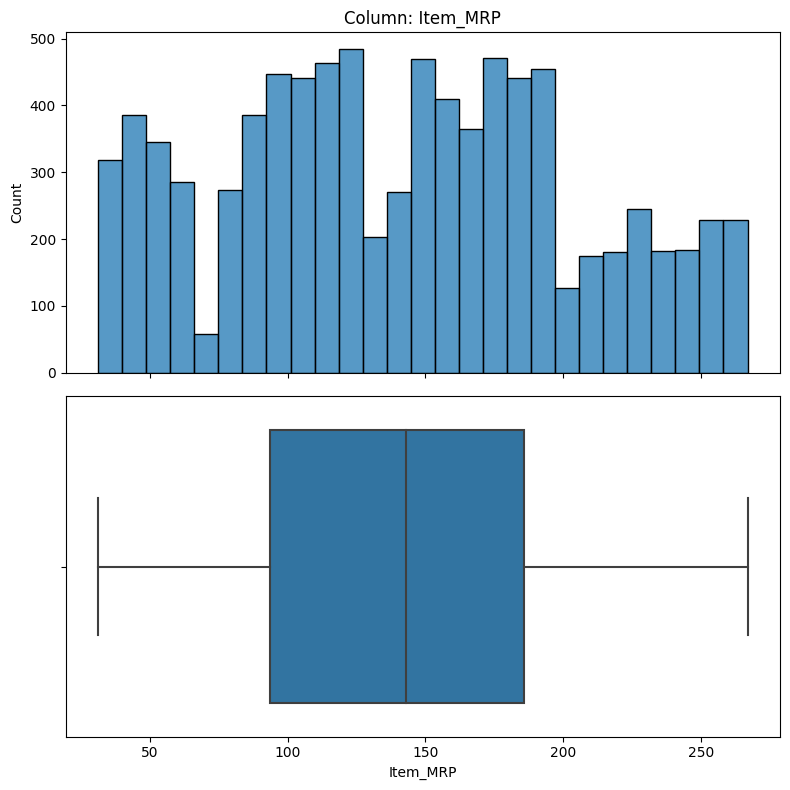

In [111]:
x = 'Item_MRP'
fig, axes = plt.subplots(nrows=2, figsize=(8,8), sharex=True)
sns.histplot(data=df_sp, x=x, ax=axes[0])
sns.boxplot(datads=df_sp, x=x, ax=axes[1])
axes[0].set_title(f'Column: {x}')
fig.tight_layout()

In [124]:
null_count = df_sp[x].isna().sum()
null_perc = null_count/len(df_sp)* 100
print(f'- NaNs Found: {null_count}')

- NaNs Found: 0


- "Item_MRP" is a numeric feature and "Outlet_Location_Type" is categorical(ordinal)

- There are no null values .If there was null value i would have drop the rows.

- The features are niether constant or quasi-constant.

- These features have high cardinality(>10).

- Yes we would know before the target is determined.

- Yes, the location type plays a crucial role for increasing sales

##**Multivariate Visualization**

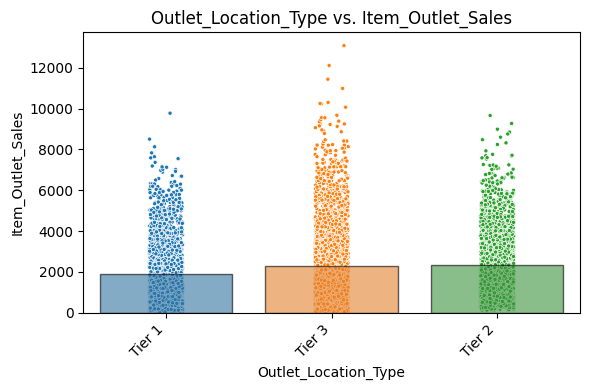

In [133]:
x = 'Outlet_Location_Type'
y = 'Item_Outlet_Sales'
fig, ax = plt.subplots(figsize=(6,4))
sns.stripplot(data=df_sp, x=x, y=y, hue=x, ax=ax,
              legend=False, edgecolor='white',
              linewidth = 0.5, size=3, zorder=0)
sns.barplot(data=df_sp, x=x, y=y, ax=ax, alpha=0.6,
            linewidth=1, edgecolor='black', errorbar=None,
            )
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
ax.set_title(f"{x} vs. {y}")
fig.tight_layout()



- I would expect this feature to be  predictor of the target because there are more sales in the Tier 3 locations

- I believe it does appear to be a predictor of the target because it possibly predicts having more tier 3 loactions will make sales go up